tEB


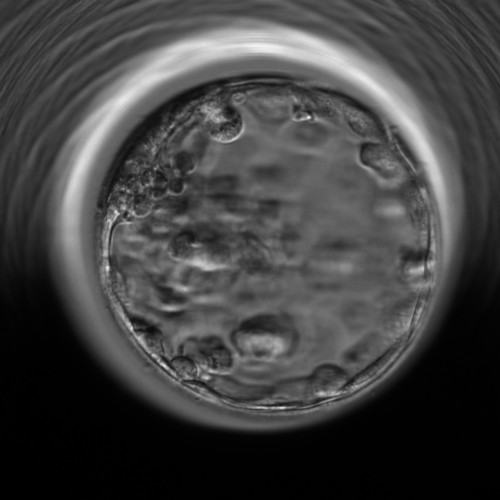

In [1]:
import os
import random
from PIL import Image

data_folder = "data/val"


categories = os.listdir(data_folder)
categories.sort()
category = random.choice(categories)
print(category)

images = os.listdir(data_folder + "/" + category)
image = random.choice(images)
embryo = Image.open(data_folder + "/" + category + "/" + image)
embryo = embryo.convert('RGB')
embryo

In [2]:
import tensorflow as tf
from model import EmbryoClassifier

model = EmbryoClassifier(num_classes=16)
model.load()


2024-05-09 21:23:05.926568: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-09 21:23:05.979343: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 21:23:07.611479: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input

image = np.array(embryo)
image = tf.image.resize(image, [256, 256])
image = preprocess_input(tf.expand_dims(image, axis=0))
pred = model(image).numpy()[0]
pred = categories[np.argmax(pred)]

print(f"Predicted Category: {pred}")

Predicted Category: tEB


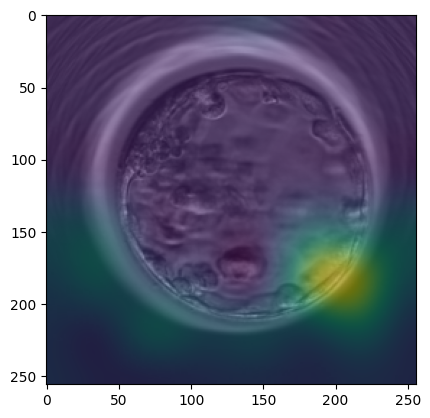

In [5]:
from heatmap import generate_heatmap

import matplotlib.pyplot as plt
from scipy.ndimage import zoom

gradcam = generate_heatmap(model, image)
scale = 256 / gradcam.shape[0]
plt.imshow(embryo.resize((256, 256)))
plt.imshow(zoom(gradcam, zoom=(scale, scale)), alpha=0.5)

Epoch 1/5

807/807 [==============================] - 344s 412ms/step - loss: 1.5229 - accuracy: 0.4897 - val_loss: 1.3138 - val_accuracy: 0.5581

Epoch 2/5

807/807 [==============================] - 330s 407ms/step - loss: 1.3090 - accuracy: 0.5479 - val_loss: 1.2949 - val_accuracy: 0.5634

Epoch 3/5

807/807 [==============================] - 330s 407ms/step - loss: 1.2542 - accuracy: 0.5633 - val_loss: 1.2872 - val_accuracy: 0.5685

Epoch 4/5

807/807 [==============================] - 324s 400ms/step - loss: 1.2168 - accuracy: 0.5748 - val_loss: 1.2856 - val_accuracy: 0.5668

Epoch 5/5

807/807 [==============================] - 321s 396ms/step - loss: 1.1911 - accuracy: 0.5819 - val_loss: 1.2886 - val_accuracy: 0.5713

Evaluating model

123/123 [==============================] - 45s 351ms/step - loss: 1.3676 - accuracy: 0.5559